In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Attempt 3

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [3]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

## Preprocessing

In [4]:
#drop missing values
data_at3 = raw_data.dropna(axis=0)
data_at3 = data_at3.drop(['Body', 'EngineV', 'Engine Type','Registration', 'Model'], axis=1)
data_at3.head()

Brand    Price  Mileage  Year
0            BMW   4200.0      277  1991
1  Mercedes-Benz   7900.0      427  1999
2  Mercedes-Benz  13300.0      358  2003
3           Audi  23000.0      240  2007
4         Toyota  18300.0      120  2011

#### Clean up distributions

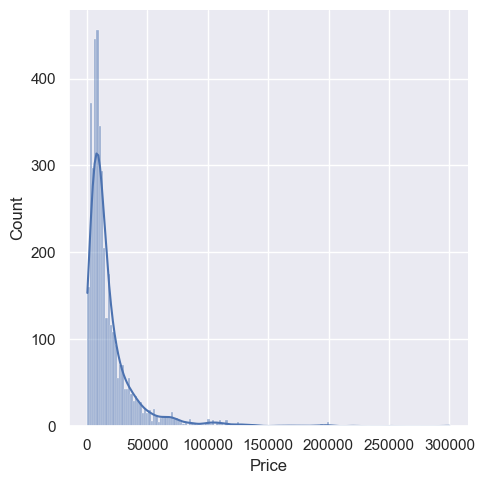

In [5]:
sns.displot(data_at3['Price'], kde=True)

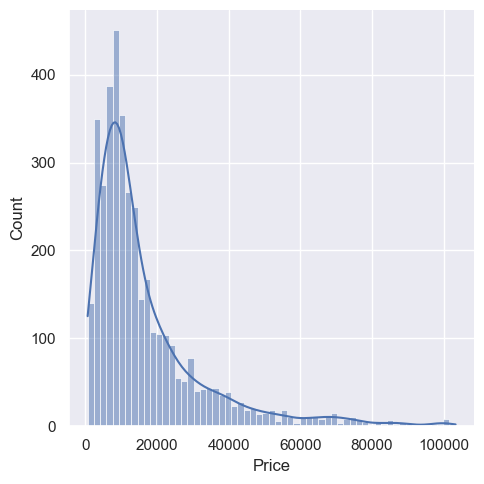

In [6]:
q = data_at3['Price'].quantile(0.98)
data_at3_t = data_at3[data_at3['Price']<q]

sns.displot(data_at3_t['Price'], kde=True)

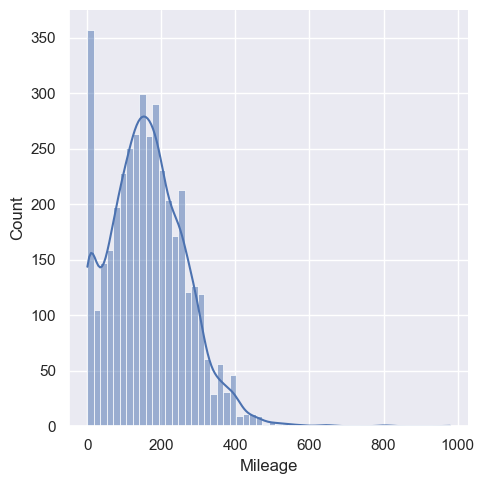

In [7]:
sns.displot(data_at3['Mileage'], kde=True)

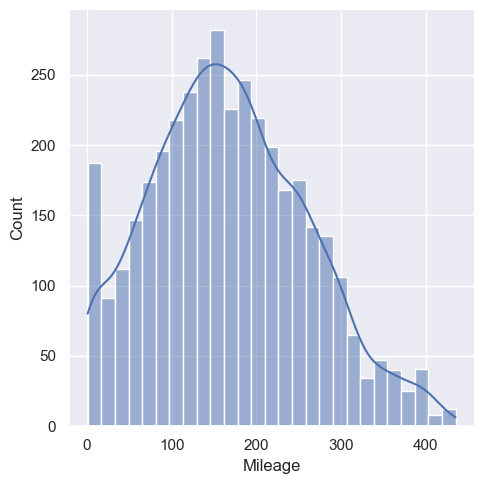

In [8]:
q = data_at3_t['Mileage'].quantile(0.99)
data_at3_t = data_at3_t[data_at3_t['Mileage']<q]
q = data_at3_t['Mileage'].quantile(0.01)
data_at3_t = data_at3_t[data_at3_t['Mileage']>q]
sns.displot(data_at3_t['Mileage'], kde=True)

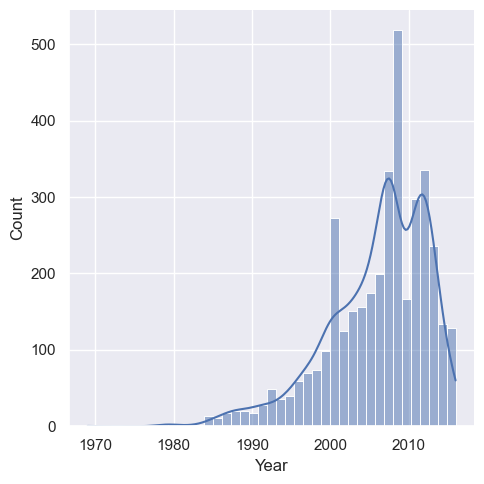

In [9]:
sns.displot(data_at3_t['Year'], kde=True)

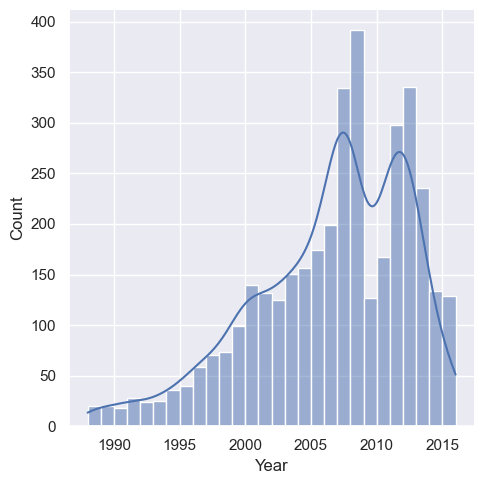

In [10]:
q = data_at3_t['Year'].quantile(0.01)
data_at3_t = data_at3_t[data_at3_t['Year']>q]
sns.displot(data_at3_t['Year'], kde=True)

In [11]:
data_cleaned = data_at3_t.reset_index(drop=True)
data_cleaned.head()

Brand    Price  Mileage  Year
0            BMW   4200.0      277  1991
1  Mercedes-Benz   7900.0      427  1999
2  Mercedes-Benz  13300.0      358  2003
3           Audi  23000.0      240  2007
4         Toyota  18300.0      120  2011

#### OLS Assumptions

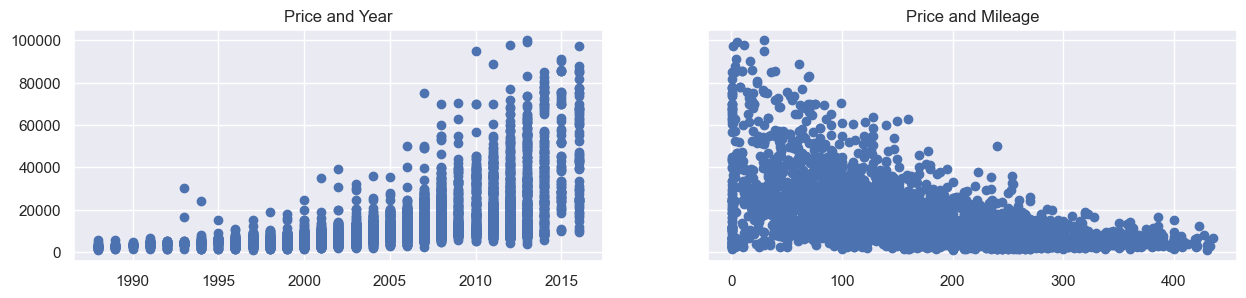

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Price and Mileage')


plt.show()

In [13]:
data_ready = data_cleaned
data_ready['Log Price'] = np.log(data_cleaned['Price'])
data_ready =  data_ready.drop('Price', axis=1)

data_ready.head()

Brand  Mileage  Year  Log Price
0            BMW      277  1991   8.342840
1  Mercedes-Benz      427  1999   8.974618
2  Mercedes-Benz      358  2003   9.495519
3           Audi      240  2007  10.043249
4         Toyota      120  2011   9.814656

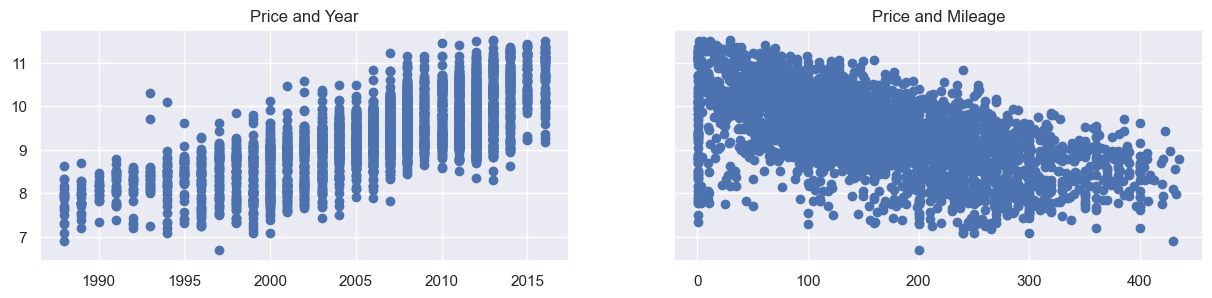

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data_ready['Year'],data_ready['Log Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_ready['Mileage'],data_ready['Log Price'])
ax2.set_title('Price and Mileage')


plt.show()

In [15]:
#reorganize variables
data_ready = data_ready[['Log Price', 'Mileage', 'Year', 'Brand']]
data_ready.head()

Log Price  Mileage  Year          Brand
0   8.342840      277  1991            BMW
1   8.974618      427  1999  Mercedes-Benz
2   9.495519      358  2003  Mercedes-Benz
3  10.043249      240  2007           Audi
4   9.814656      120  2011         Toyota

#### Create dummy variables

In [16]:
data_dummies = pd.get_dummies(data_ready, drop_first=True)
data_dummies.head()

Log Price  Mileage  Year  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
0   8.342840      277  1991       True                False             False   
1   8.974618      427  1999      False                 True             False   
2   9.495519      358  2003      False                 True             False   
3  10.043249      240  2007      False                False             False   
4   9.814656      120  2011      False                False             False   

   Brand_Renault  Brand_Toyota  Brand_Volkswagen  
0          False         False             False  
1          False         False             False  
2          False         False             False  
3          False         False             False  
4          False          True             False

Multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
variables = data_dummies[['Mileage', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

VIF Features
0  4.267317  Mileage
1  4.267317     Year

In [19]:
data_dummies_int = pd.get_dummies(data_ready, drop_first=True).astype(int)
data_dummies_int.head()

variables_2 = data_dummies_int.drop('Log Price', axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables_2, i) for i in range(variables_2.shape[1])]
vif['Features'] = variables_2.columns

vif

VIF             Features
0   4.555649              Mileage
1  13.440430                 Year
2   2.518453            Brand_BMW
3   2.768470  Brand_Mercedes-Benz
4   1.756005     Brand_Mitsubishi
5   2.082340        Brand_Renault
6   2.270362         Brand_Toyota
7   3.080785     Brand_Volkswagen

#### Scaling Variables

In [20]:
targets = data_dummies['Log Price']
inputs = data_dummies.drop(['Log Price'], axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## Linear Regression

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [25]:
reg = LinearRegression()
reg.fit(x_train,y_train)
yhat = reg.predict(x_train)

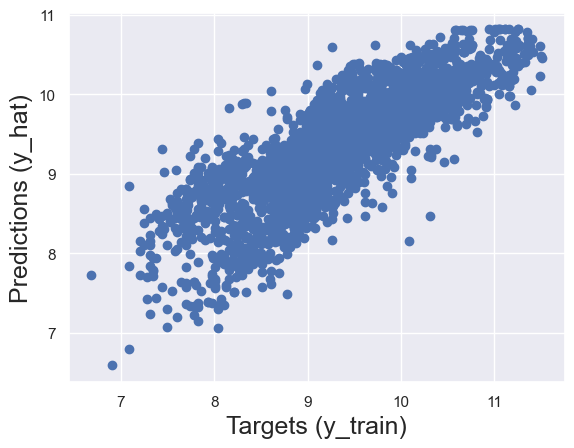

In [26]:
plt.scatter(y_train, yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals')

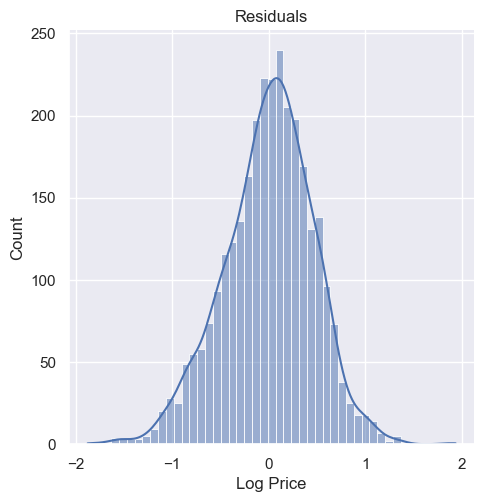

In [27]:
sns.displot(y_train - yhat, kde=True)
plt.title("Residuals")

In [28]:
r2 = reg.score(x_train, y_train)

n = inputs.shape[0]
p = inputs.shape[1]
adj_r2 = 1 - (1 - r2)*((n-1)/(n-p-1))

r2scores = pd.DataFrame([['r2', r2], ['adj_r2', adj_r2]])
r2scores

0         1
0      r2  0.684590
1  adj_r2  0.683914

#### Testing

In [29]:
yhat_test = reg.predict(x_test)

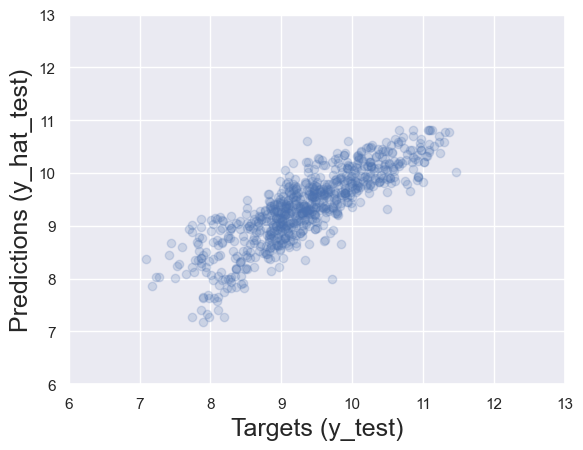

In [30]:
plt.scatter(y_test, yhat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [31]:
df_pf = pd.DataFrame(np.exp(yhat_test), columns=['Prediction'])
df_pf.head()

Prediction
0  11110.113874
1  16408.853707
2   4681.760869
3  15941.084280
4  29311.057602

In [32]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

Prediction   Target
0  11110.113874   7400.0
1  16408.853707  14500.0
2   4681.760869   4950.0
3  15941.084280   9600.0
4  29311.057602  24300.0

In [33]:
df_pf['Residual'] = df_pf['Prediction'] - df_pf['Target']
df_pf.head()

Prediction   Target     Residual
0  11110.113874   7400.0  3710.113874
1  16408.853707  14500.0  1908.853707
2   4681.760869   4950.0  -268.239131
3  15941.084280   9600.0  6341.084280
4  29311.057602  24300.0  5011.057602

In [34]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction   Target      Residual  Difference%
0    11110.113874   7400.0   3710.113874    50.136674
1    16408.853707  14500.0   1908.853707    13.164508
2     4681.760869   4950.0   -268.239131     5.418972
3    15941.084280   9600.0   6341.084280    66.052961
4    29311.057602  24300.0   5011.057602    20.621636
..            ...      ...           ...          ...
744  12714.664611  24500.0 -11785.335389    48.103410
745   6462.542252   8500.0  -2037.457748    23.970091
746   6252.674913   9600.0  -3347.325087    34.867970
747   3354.614472   2350.0   1004.614472    42.749552
748   6834.488398   6900.0    -65.511602     0.949444

[749 rows x 4 columns]

In [35]:
df_pf.describe()

Prediction        Target      Residual  Difference%
count    749.000000    749.000000    749.000000   749.000000
mean   14424.120837  16156.144393  -1732.023555    38.910417
std     9611.321973  14807.268520   9012.696082    39.311617
min     1319.212227   1200.000000 -72661.929315     0.034616
25%     7578.615448   7000.000000  -3353.114032    13.972815
50%    11675.835275  11000.000000   -384.214054    28.901145
75%    18801.547941  20300.000000   2936.512059    48.362551
max    49687.050164  95000.000000  28933.080436   262.568908